In [1]:
#Importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error, confusion_matrix, f1_score

In [2]:
#Read the datafile
df = pd.read_csv("clean_kaggle_data_2020.csv", low_memory=False)
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10726,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
10727,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
10728,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"


In [3]:
# Drop the first row as it will not be used for the analysis
df=df.drop(df.index[0])
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,"70,000-79,999"
5,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,Python,NaN,NaN,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"
10726,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1.0,"10,000-19,999"
10727,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
10728,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN,0.0,"0-9,999"


# 1. Data cleaning and preparation

## 1.1 Handle missing values and Engineer Features

In [4]:
#Check which columns have missing values
index_list = df.loc[:, df.isnull().any()].columns.to_list()
index_list

['Q7_Part_1',
 'Q7_Part_2',
 'Q7_Part_3',
 'Q7_Part_4',
 'Q7_Part_5',
 'Q7_Part_6',
 'Q7_Part_7',
 'Q7_Part_8',
 'Q7_Part_9',
 'Q7_Part_10',
 'Q7_Part_11',
 'Q7_Part_12',
 'Q7_OTHER',
 'Q8',
 'Q9_Part_1',
 'Q9_Part_2',
 'Q9_Part_3',
 'Q9_Part_4',
 'Q9_Part_5',
 'Q9_Part_6',
 'Q9_Part_7',
 'Q9_Part_8',
 'Q9_Part_9',
 'Q9_Part_10',
 'Q9_Part_11',
 'Q9_OTHER',
 'Q10_Part_1',
 'Q10_Part_2',
 'Q10_Part_3',
 'Q10_Part_4',
 'Q10_Part_5',
 'Q10_Part_6',
 'Q10_Part_7',
 'Q10_Part_8',
 'Q10_Part_9',
 'Q10_Part_10',
 'Q10_Part_11',
 'Q10_Part_12',
 'Q10_Part_13',
 'Q10_OTHER',
 'Q11',
 'Q12_Part_1',
 'Q12_Part_2',
 'Q12_Part_3',
 'Q12_OTHER',
 'Q13',
 'Q14_Part_1',
 'Q14_Part_2',
 'Q14_Part_3',
 'Q14_Part_4',
 'Q14_Part_5',
 'Q14_Part_6',
 'Q14_Part_7',
 'Q14_Part_8',
 'Q14_Part_9',
 'Q14_Part_10',
 'Q14_Part_11',
 'Q14_OTHER',
 'Q15',
 'Q16_Part_1',
 'Q16_Part_2',
 'Q16_Part_3',
 'Q16_Part_4',
 'Q16_Part_5',
 'Q16_Part_6',
 'Q16_Part_7',
 'Q16_Part_8',
 'Q16_Part_9',
 'Q16_Part_10',
 'Q16_Part_1

According to the survey answer choice document, Q7, Q9-10, Q12, Q14, Q16-19, Q23, Q26-29, Q31, Q33-37, Q39 are multiple choice questions. In the survey result, each choice within a multiple choice question is turned into a column and the missing values in the column indicate that the respondents did not select this particular choice. Therefore, it is deemed suitable to convert these missing values into 0 and non-missing values to 1 instead of dropping the entire column.

In [5]:
# Define functions to convert NaN to 0 and non-missing values to 1
pd.options.mode.chained_assignment = None

def convert1(column):
        column.loc[column!=0]=1

def fixNaN(column):
    column.fillna(0, inplace=True)
    column=convert1(column)

In [6]:
# Define a list including the headings of all multiple choice questions using the list output from checking missing values
# Use this list to convert all missing values to 0 and the non-missing values to 1

MC_list = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5',
       'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9', 'Q7_Part_10',
       'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q9_Part_1', 'Q9_Part_2',
       'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7',
       'Q9_Part_8', 'Q9_Part_9', 'Q9_Part_10', 'Q9_Part_11', 'Q9_OTHER',
       'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_3', 'Q10_Part_4', 'Q10_Part_5',
       'Q10_Part_6', 'Q10_Part_7', 'Q10_Part_8', 'Q10_Part_9', 'Q10_Part_10',
       'Q10_Part_11', 'Q10_Part_12', 'Q10_Part_13', 'Q10_OTHER',
       'Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_OTHER',
       'Q14_Part_1', 'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q14_Part_5',
       'Q14_Part_6', 'Q14_Part_7', 'Q14_Part_8', 'Q14_Part_9', 'Q14_Part_10',
       'Q14_Part_11', 'Q14_OTHER', 'Q16_Part_1', 'Q16_Part_2',
       'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7',
       'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12',
       'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_OTHER', 'Q17_Part_1',
       'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4', 'Q17_Part_5', 'Q17_Part_6',
       'Q17_Part_7', 'Q17_Part_8', 'Q17_Part_9', 'Q17_Part_10', 'Q17_Part_11',
       'Q17_OTHER', 'Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4',
       'Q18_Part_5', 'Q18_Part_6', 'Q18_OTHER', 'Q19_Part_1', 'Q19_Part_2',
       'Q19_Part_3', 'Q19_Part_4', 'Q19_Part_5', 'Q19_OTHER', 'Q23_Part_1',
       'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5', 'Q23_Part_6',
       'Q23_Part_7', 'Q23_OTHER', 'Q26_A_Part_1', 'Q26_A_Part_2',
       'Q26_A_Part_3', 'Q26_A_Part_4', 'Q26_A_Part_5', 'Q26_A_Part_6',
       'Q26_A_Part_7', 'Q26_A_Part_8', 'Q26_A_Part_9', 'Q26_A_Part_10',
       'Q26_A_Part_11', 'Q26_A_OTHER', 'Q27_A_Part_1', 'Q27_A_Part_2',
       'Q27_A_Part_3', 'Q27_A_Part_4', 'Q27_A_Part_5', 'Q27_A_Part_6',
       'Q27_A_Part_7', 'Q27_A_Part_8', 'Q27_A_Part_9', 'Q27_A_Part_10',
       'Q27_A_Part_11', 'Q27_A_OTHER', 'Q28_A_Part_1', 'Q28_A_Part_2',
       'Q28_A_Part_3', 'Q28_A_Part_4', 'Q28_A_Part_5', 'Q28_A_Part_6',
       'Q28_A_Part_7', 'Q28_A_Part_8', 'Q28_A_Part_9', 'Q28_A_Part_10',
       'Q28_A_OTHER', 'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_3',
       'Q29_A_Part_4', 'Q29_A_Part_5', 'Q29_A_Part_6', 'Q29_A_Part_7',
       'Q29_A_Part_8', 'Q29_A_Part_9', 'Q29_A_Part_10', 'Q29_A_Part_11',
       'Q29_A_Part_12', 'Q29_A_Part_13', 'Q29_A_Part_14', 'Q29_A_Part_15',
       'Q29_A_Part_16', 'Q29_A_Part_17', 'Q29_A_OTHER', 'Q31_A_Part_1',
       'Q31_A_Part_2', 'Q31_A_Part_3', 'Q31_A_Part_4', 'Q31_A_Part_5',
       'Q31_A_Part_6', 'Q31_A_Part_7', 'Q31_A_Part_8', 'Q31_A_Part_9',
       'Q31_A_Part_10', 'Q31_A_Part_11', 'Q31_A_Part_12', 'Q31_A_Part_13',
       'Q31_A_Part_14', 'Q31_A_OTHER', 'Q33_A_Part_1', 'Q33_A_Part_2',
       'Q33_A_Part_3', 'Q33_A_Part_4', 'Q33_A_Part_5', 'Q33_A_Part_6',
       'Q33_A_Part_7', 'Q33_A_OTHER', 'Q34_A_Part_1', 'Q34_A_Part_2',
       'Q34_A_Part_3', 'Q34_A_Part_4', 'Q34_A_Part_5', 'Q34_A_Part_6',
       'Q34_A_Part_7', 'Q34_A_Part_8', 'Q34_A_Part_9', 'Q34_A_Part_10',
       'Q34_A_Part_11', 'Q34_A_OTHER', 'Q35_A_Part_1', 'Q35_A_Part_2',
       'Q35_A_Part_3', 'Q35_A_Part_4', 'Q35_A_Part_5', 'Q35_A_Part_6',
       'Q35_A_Part_7', 'Q35_A_Part_8', 'Q35_A_Part_9', 'Q35_A_Part_10',
       'Q35_A_OTHER', 'Q36_Part_1', 'Q36_Part_2', 'Q36_Part_3', 'Q36_Part_4',
       'Q36_Part_5', 'Q36_Part_6', 'Q36_Part_7', 'Q36_Part_8', 'Q36_Part_9',
       'Q36_OTHER', 'Q37_Part_1', 'Q37_Part_2', 'Q37_Part_3', 'Q37_Part_4',
       'Q37_Part_5', 'Q37_Part_6', 'Q37_Part_7', 'Q37_Part_8', 'Q37_Part_9',
       'Q37_Part_10', 'Q37_Part_11', 'Q37_OTHER', 'Q39_Part_1',
       'Q39_Part_2', 'Q39_Part_3', 'Q39_Part_4', 'Q39_Part_5', 'Q39_Part_6',
       'Q39_Part_7', 'Q39_Part_8', 'Q39_Part_9', 'Q39_Part_10', 'Q39_Part_11',
       'Q39_OTHER', 'Q26_B_Part_1', 'Q26_B_Part_2', 'Q26_B_Part_3',
       'Q26_B_Part_4', 'Q26_B_Part_5', 'Q26_B_Part_6', 'Q26_B_Part_7',
       'Q26_B_Part_8', 'Q26_B_Part_9', 'Q26_B_Part_10', 'Q26_B_Part_11',
       'Q26_B_OTHER', 'Q27_B_Part_1', 'Q27_B_Part_2', 'Q27_B_Part_3',
       'Q27_B_Part_4', 'Q27_B_Part_5', 'Q27_B_Part_6', 'Q27_B_Part_7',
       'Q27_B_Part_8', 'Q27_B_Part_9', 'Q27_B_Part_10', 'Q27_B_Part_11',
       'Q27_B_OTHER', 'Q28_B_Part_1', 'Q28_B_Part_2', 'Q28_B_Part_3',
       'Q28_B_Part_4', 'Q28_B_Part_5', 'Q28_B_Part_6', 'Q28_B_Part_7',
       'Q28_B_Part_8', 'Q28_B_Part_9', 'Q28_B_Part_10', 'Q28_B_OTHER',
       'Q29_B_Part_1', 'Q29_B_Part_2', 'Q29_B_Part_3', 'Q29_B_Part_4',
       'Q29_B_Part_5', 'Q29_B_Part_6', 'Q29_B_Part_7', 'Q29_B_Part_8',
       'Q29_B_Part_9', 'Q29_B_Part_10', 'Q29_B_Part_11', 'Q29_B_Part_12',
       'Q29_B_Part_13', 'Q29_B_Part_14', 'Q29_B_Part_15', 'Q29_B_Part_16',
       'Q29_B_Part_17', 'Q29_B_OTHER', 'Q31_B_Part_1', 'Q31_B_Part_2',
       'Q31_B_Part_3', 'Q31_B_Part_4', 'Q31_B_Part_5', 'Q31_B_Part_6',
       'Q31_B_Part_7', 'Q31_B_Part_8', 'Q31_B_Part_9', 'Q31_B_Part_10',
       'Q31_B_Part_11', 'Q31_B_Part_12', 'Q31_B_Part_13', 'Q31_B_Part_14',
       'Q31_B_OTHER', 'Q33_B_Part_1', 'Q33_B_Part_2', 'Q33_B_Part_3',
       'Q33_B_Part_4', 'Q33_B_Part_5', 'Q33_B_Part_6', 'Q33_B_Part_7',
       'Q33_B_OTHER', 'Q34_B_Part_1', 'Q34_B_Part_2', 'Q34_B_Part_3',
       'Q34_B_Part_4', 'Q34_B_Part_5', 'Q34_B_Part_6', 'Q34_B_Part_7',
       'Q34_B_Part_8', 'Q34_B_Part_9', 'Q34_B_Part_10', 'Q34_B_Part_11',
       'Q34_B_OTHER', 'Q35_B_Part_1', 'Q35_B_Part_2', 'Q35_B_Part_3',
       'Q35_B_Part_4', 'Q35_B_Part_5', 'Q35_B_Part_6', 'Q35_B_Part_7',
       'Q35_B_Part_8', 'Q35_B_Part_9', 'Q35_B_Part_10', 'Q35_B_OTHER']

for name in MC_list:
    fixNaN(df[name])

In [7]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,1,1,1,...,0,0,0,0,0,0,0,0,10.0,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,0,0,0,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,1,0,1,...,0,0,0,0,0,0,0,0,11.0,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,1,0,1,...,0,0,0,0,0,0,0,0,7.0,"70,000-79,999"
5,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,0,1,0,...,0,0,0,0,0,0,0,0,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,2104,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,1,0,0,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"
10726,5461,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,0,0,1,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
10727,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1,0,0,...,0,0,0,0,0,0,0,0,0.0,"0-9,999"
10728,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1,0,1,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"


In [8]:
# Check again for missing values to confirm if the conversion is right
df.loc[:, df.isnull().any()].columns

Index(['Q8', 'Q11', 'Q13', 'Q15', 'Q25', 'Q30', 'Q32', 'Q38'], dtype='object')

In [9]:
# Check how many missing values exist in each single choice question
df[['Q8', 'Q11', 'Q13', 'Q15', 'Q25', 'Q30', 'Q32', 'Q38']].isnull().sum(axis=0)

Q8      561
Q11     561
Q13     561
Q15     561
Q25     159
Q30    7216
Q32    9231
Q38    1253
dtype: int64

As shown, there seems to be a pattern of missing values in Q8, Q11, Q13 and Q15. Therefore, it is decided to examine questions before Q8 to see if anything has resulted in the pattern.

According to the survey answer choice document, Q6 asks about the respondents' programming experience and one of the options is "I have never written code". It is speculated that this option may have effects on responses of the other questions. Therefore, proceed to examine Q6 responses and see if they may have led to null values in other questions.

In [10]:
# Check responses in Q6
df['Q6'].value_counts()

3-5 years                    2444
1-2 years                    1908
5-10 years                   1901
10-20 years                  1488
< 1 years                    1281
20+ years                    1146
I have never written code     561
Name: Q6, dtype: int64

In [11]:
# Check Q6 responses that correspond to the null response in Q8

Q6_q8null = df[df['Q8'].isnull()]['Q6']
Q6_q8null.value_counts()

I have never written code    561
Name: Q6, dtype: int64

In [12]:
# Check Q6 responses that correspond to the null response in Q11

Q6_q11null = df[df['Q11'].isnull()]['Q6']
Q6_q11null.value_counts()


I have never written code    561
Name: Q6, dtype: int64

In [13]:
# Check Q6 responses that correspond to the null response in Q13

Q6_q13null = df[df['Q13'].isnull()]['Q6']
Q6_q13null.value_counts()

I have never written code    561
Name: Q6, dtype: int64

In [14]:
# Check Q6 responses that correspond to the null response in Q15

Q6_q15null = df[df['Q15'].isnull()]['Q6']
Q6_q15null.value_counts()

I have never written code    561
Name: Q6, dtype: int64

It is observed that respondents who answered "I have never written code" in Q6 all skipped Q8, Q11, Q13 and Q15. However, considering that "I have never written code" may be an important predictor of their annual salaries, it is decided to fill in these missing values with "I have never coded".

In [15]:
# Fill Q8's missing values with "I have never coded"
df['Q8'].fillna("I have never coded", inplace=True)
df['Q8'].value_counts()

Python                8002
R                      803
SQL                    618
I have never coded     561
C++                    140
C                      130
MATLAB                 105
Other                  100
Java                    80
Julia                   78
Javascript              55
None                    33
Bash                    16
Swift                    8
Name: Q8, dtype: int64

In [16]:
# Fill Q11's missing values with "I have never coded"
df['Q11'].fillna("I have never coded", inplace=True)
df['Q11'].value_counts()

A personal computer or laptop                                          7597
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)    1662
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)               627
I have never coded                                                      561
Other                                                                   152
None                                                                    130
Name: Q11, dtype: int64

In [17]:
# Fill Q13's missing values with "I have never coded"
df['Q13'].fillna("I have never coded", inplace=True)
df['Q13'].value_counts()

Never                 7039
2-5 times             1422
Once                  1202
I have never coded     561
6-25 times             305
More than 25 times     200
Name: Q13, dtype: int64

In [18]:
# Fill Q15's missing values with "I have never coded"
df['Q15'].fillna("I have never coded", inplace=True)
df['Q15'].value_counts()

Under 1 year                             3038
1-2 years                                2223
2-3 years                                1248
I do not use machine learning methods    1055
3-4 years                                 772
5-10 years                                746
4-5 years                                 693
I have never coded                        561
10-20 years                               229
20 or more years                          164
Name: Q15, dtype: int64

In [19]:
# Check again for missing values to confirm if the conversion is right
df.loc[:, df.isnull().any()].columns

Index(['Q25', 'Q30', 'Q32', 'Q38'], dtype='object')

In [20]:
# Check how many missing values exist in each single choice question
df[['Q25', 'Q30', 'Q32', 'Q38']].isnull().sum(axis=0)

Q25     159
Q30    7216
Q32    9231
Q38    1253
dtype: int64

In [21]:
# Check Q6 responses that correspond to the null response in Q25

Q6_q25null = df[df['Q25'].isnull()]['Q6']
Q6_q25null.value_counts()

< 1 years                    28
3-5 years                    28
1-2 years                    26
5-10 years                   25
I have never written code    25
10-20 years                  17
20+ years                    10
Name: Q6, dtype: int64

According to the survey answer choice document, Q25 asks the respondents how much money have they or their team spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years. Because the number of null responses that correspond to "I have never written code" in Q6 is very little, it is decided not to fill these missing values with "I have never coded". 

It is suspected that Q25 may have a certain pattern associated with Q24, which asks for the respondents' annual salaries. Therefore, Q24's responses that correspond to the null values in Q25 are examined here.

In [22]:
# Check Q24's responses that correspond to the null values in Q25
Q24_q25null = df[df['Q25'].isnull()]['Q24']
Q24_q25null.value_counts()

$0-999             67
1,000-1,999        16
2,000-2,999        11
30,000-39,999      10
40,000-49,999       6
100,000-124,999     6
70,000-79,999       5
7,500-9,999         4
150,000-199,999     4
15,000-19,999       4
10,000-14,999       4
50,000-59,999       3
60,000-69,999       3
5,000-7,499         3
3,000-3,999         3
80,000-89,999       2
20,000-24,999       2
> $500,000          2
4,000-4,999         2
25,000-29,999       1
90,000-99,999       1
Name: Q24, dtype: int64

It is found that most null values in Q25 are associated with low annual salaries ($0-2999). This may suggest that these respondents may spend less money or even no money on machine learning and/or cloud computing services. Therefore, it is decided to fill in the null values with the mode of the amount of money in the lower range in Q25.

In [23]:
# Check the responses in Q25
df['Q25'].value_counts()

$0 ($USD)                  3856
$1000-$9,999               1829
$100-$999                  1764
$1-$99                     1317
$10,000-$99,999            1075
$100,000 or more ($USD)     729
Name: Q25, dtype: int64

As shown, "0 USD" has the highest number of responses. Therefore, it is deemed suitable to fill the missing values with "0 USD" (the mode).

In [24]:
# Fill Q25 with mode
df['Q25'].fillna(df['Q25'].mode()[0], inplace=True)

# Check how many missing values exist in Q25
df['Q25'].isnull().sum()

0

In [25]:
# Checking how many percent does the missing values take up in Q30, Q32 and Q38
print("{:.2f}".format(df['Q30'].isnull().sum()/len(df['Q30'])*100), "% of data are missing in Q30.")
print("{:.2f}".format(df['Q32'].isnull().sum()/len(df['Q32'])*100), "% of data are missing in Q32.")
print("{:.2f}".format(df['Q38'].isnull().sum()/len(df['Q38'])*100), "% of data are missing in Q38.")

67.26 % of data are missing in Q30.
86.04 % of data are missing in Q32.
11.68 % of data are missing in Q38.


As shown above, more than 50% of data are missing in Q30 and Q32. Using 20% as the threshold, it is decided to drop the these two features.

In [26]:
# Drop Q30 column and Q32 column
df = df.drop(['Q30','Q32'], axis=1)

In [27]:
# Check the responses in Q38
df['Q38'].value_counts()

Local development environments (RStudio, JupyterLab, etc.)              4289
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2815
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     676
Advanced statistical software (SPSS, SAS, etc.)                          621
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                 580
Other                                                                    495
Name: Q38, dtype: int64

According to the survey answer choice document, Q38 asks the respondents for the primary tool for data analysis they use at work/school. This is a single choice question and does not seem to be a follow-up/related question of the previous question. Therefore it is decided to fill in the missing values with the mode.

In [28]:
# Check Q6 responses that correspond to the null response in Q38

Q6_q38null = df[df['Q38'].isnull()]['Q6']
Q6_q38null.value_counts()

1-2 years                    246
3-5 years                    244
I have never written code    225
< 1 years                    186
5-10 years                   161
10-20 years                  117
20+ years                     74
Name: Q6, dtype: int64

As shown, the number of null responses in Q38 that corresponds to "I have never written code" in Q6 only takes about 18% of the total null responses. Therefore it is decided not to fill these values with "I have never coded" but to fill all null values with the mode of Q38's responses.

In [29]:
# Fill Q38 with mode
df['Q38'].fillna(df['Q38'].mode()[0], inplace=True)

# Check how many missing values exist in Q38
df['Q38'].isnull().sum()

0

It is deemed that the first column - time from start to finish (seconds) - provides little insights into the annual salaries of the respondents. Therefore the first column is dropped.

In [30]:
# Drop the column "Time from start to finish (seconds)"
df = df.drop('Time from Start to Finish (seconds)', axis=1)

In [31]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,1,1,1,0,...,0,0,0,0,0,0,0,0,10.0,"100,000-124,999"
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,1,0,1,0,...,0,0,0,0,0,0,0,0,11.0,"125,000-149,9991"
4,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,1,0,1,0,...,0,0,0,0,0,0,0,0,7.0,"70,000-79,999"
5,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,0,1,0,0,...,0,0,0,0,0,0,0,0,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,1,0,0,0,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"
10726,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,0,0,1,1,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
10727,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,"0-9,999"
10728,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1,0,1,1,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"


## 1.2 Encode the remaining categorical variables

Having dealth with all missing values, one-hot-encoding is used to encode the first 6 features with dummy variables. But before that, categories within each feature is examined to determine if some categories within one feature (e.g. categoreis with very few number of respondents) should be dropped.

In [32]:
# Check how many categoreis exist in Q1-Q6, Q8, Q11, Q13, Q15, Q20, Q21, Q22, Q25, Q38
print(df['Q1'].nunique(), "categories exist in Q1")
print(df['Q2'].nunique(), "categories exist in Q2")
print(df['Q3'].nunique(), "categories exist in Q3")
print(df['Q4'].nunique(), "categories exist in Q4")
print(df['Q5'].nunique(), "categories exist in Q5")
print(df['Q6'].nunique(), "categories exist in Q6")
print(df['Q8'].nunique(), "categories exist in Q8")
print(df['Q11'].nunique(), "categories exist in Q11")
print(df['Q13'].nunique(), "categories exist in Q13")
print(df['Q15'].nunique(), "categories exist in Q15")
print(df['Q20'].nunique(), "categories exist in Q20")
print(df['Q21'].nunique(), "categories exist in Q21")
print(df['Q22'].nunique(), "categories exist in Q22")
print(df['Q25'].nunique(), "categories exist in Q25")
print(df['Q38'].nunique(), "categories exist in Q38")


11 categories exist in Q1
5 categories exist in Q2
55 categories exist in Q3
7 categories exist in Q4
11 categories exist in Q5
7 categories exist in Q6
14 categories exist in Q8
6 categories exist in Q11
6 categories exist in Q13
10 categories exist in Q15
5 categories exist in Q20
7 categories exist in Q21
6 categories exist in Q22
6 categories exist in Q25
6 categories exist in Q38


As shown, Q3 (countries) has 55 categories, and using onehotencoding on each category may be too excessive. Therefore, it is decided to drop countries whose the number of apperance is in the first quantile.

In [33]:
df['Q3'].value_counts()

India                                                   2353
United States of America                                1484
Other                                                    815
Brazil                                                   443
Japan                                                    385
Russia                                                   351
United Kingdom of Great Britain and Northern Ireland     350
Germany                                                  256
Nigeria                                                  246
Spain                                                    234
Canada                                                   198
France                                                   197
Italy                                                    184
China                                                    166
Turkey                                                   166
Australia                                                147
Mexico                  

In [34]:
# Show countries whose number of appearance is in the first quantile
country_counts = df['Q3'].value_counts()
countries_mask = df.Q3.isin(country_counts.index[country_counts <= np.quantile(country_counts, 0.25)])
df.loc[countries_mask,'Q3'].value_counts()

Philippines             51
Tunisia                 50
Switzerland             48
Saudi Arabia            47
Bangladesh              46
United Arab Emirates    45
Republic of Korea       42
Sri Lanka               38
Romania                 38
Belarus                 37
Belgium                 35
Ireland                 35
Ghana                   21
Nepal                   20
Name: Q3, dtype: int64

In [35]:
# Drop countries whose number of appearance is in the first quantile
df.drop(df.loc[countries_mask,'Q3'].index, inplace=True)

# Reset the index
df = df.reset_index(drop=True)

df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
0,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,1,1,1,0,...,0,0,0,0,0,0,0,0,10.0,"100,000-124,999"
1,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
2,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,1,0,1,0,...,0,0,0,0,0,0,0,0,11.0,"125,000-149,9991"
3,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,1,0,1,0,...,0,0,0,0,0,0,0,0,7.0,"70,000-79,999"
4,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,0,1,0,0,...,0,0,0,0,0,0,0,0,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,1,0,0,0,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"
10172,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,0,0,1,1,...,0,0,0,0,0,0,1,0,1.0,"10,000-19,999"
10173,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,"0-9,999"
10174,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1,0,1,1,...,0,1,0,0,1,0,0,0,0.0,"0-9,999"


In [36]:
# Convert Q1-Q6, Q8, Q11, Q13, Q15, Q20, Q21, Q22, Q25, Q38 into dummy variables
dummies_age = pd.get_dummies(df['Q1'], prefix='Age')
dummies_gender = pd.get_dummies(df['Q2'], prefix='Gender')
dummies_country = pd.get_dummies(df['Q3'], prefix='Country')
dummies_education = pd.get_dummies(df['Q4'], prefix='Education')
dummies_title = pd.get_dummies(df['Q5'], prefix='Title')
dummies_codingexperience = pd.get_dummies(df['Q6'], prefix='Coding Experience')
dummies_recommendation = pd.get_dummies(df['Q8'], prefix='lg Recommendation')
dummies_platform = pd.get_dummies(df['Q11'], prefix='Platform')
dummies_TPU = pd.get_dummies(df['Q13'], prefix='Times Using TPU')
dummies_mlexperience = pd.get_dummies(df['Q15'], prefix='ML Experience')
dummies_csize = pd.get_dummies(df['Q20'], prefix='Company Size')
dummies_dsstaff = pd.get_dummies(df['Q21'], prefix='DS Staff')
dummies_mlornot = pd.get_dummies(df['Q22'], prefix='ML or Not')
dummies_expenses = pd.get_dummies(df['Q25'], prefix='Expenses')
dummies_tool = pd.get_dummies(df['Q38'], prefix='Primary Tool')


# Add the new features to the dataframe via concating
tempdf = pd.concat([df, dummies_age, dummies_gender, dummies_country, 
                    dummies_education, dummies_title, dummies_codingexperience,
                    dummies_recommendation, dummies_platform, dummies_TPU,
                    dummies_mlexperience, dummies_csize,
                    dummies_dsstaff, dummies_mlornot, dummies_expenses, dummies_tool], axis=1)

# Drop the original columns
df = tempdf.drop(['Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q11','Q13','Q15','Q20','Q21','Q22','Q25','Q38'],axis=1)

df

,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,...,"Expenses_$10,000-$99,999","Expenses_$100,000 or more ($USD)",Expenses_$100-$999,"Expenses_$1000-$9,999","Primary Tool_Advanced statistical software (SPSS, SAS, etc.)","Primary Tool_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Primary Tool_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Primary Tool_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Primary Tool_Local development environments (RStudio, JupyterLab, etc.)",Primary Tool_Other
0,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10172,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10173,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10174,1,0,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# 2. Exploratory analysis and feature selection

## 2.1 Feature Importance Visualization

In [37]:
# Extract the top 10 features (top 10 features with the highest coefficients)
df_cor = df.drop(['Q24_buckets'], axis = 1)
coef = df_cor.corr()
top10_corr = sorted(coef['Q24_Encoded'].tolist(), reverse=True)[0:11]


In [38]:
# Get the feature names

top10_feat = []

for i in range (0,11):
    top10_feat.append(coef[coef["Q24_Encoded"]==top10_corr[i]].index.values)

top10_feat

[array(['Q24_Encoded'], dtype=object),
 array(['Country_United States of America'], dtype=object),
 array(['Expenses_$100,000 or more ($USD)'], dtype=object),
 array(['Coding Experience_20+ years'], dtype=object),
 array(['ML or Not_We have well established ML methods (i.e., models in production for more than 2 years)'],
       dtype=object),
 array(['ML Experience_5-10 years'], dtype=object),
 array(['DS Staff_20+'], dtype=object),
 array(['Expenses_$10,000-$99,999'], dtype=object),
 array(['Coding Experience_10-20 years'], dtype=object),
 array(['ML Experience_10-20 years'], dtype=object),
 array(['Company Size_10,000 or more employees'], dtype=object)]

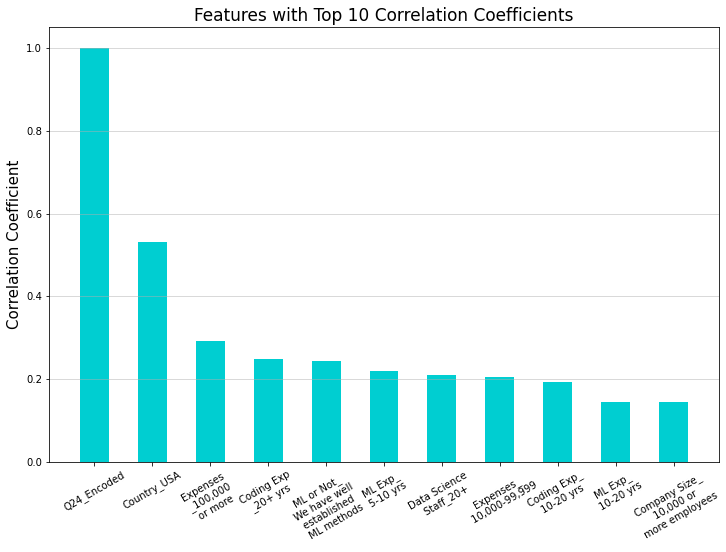

In [39]:
# Plot the top 10 features

X = np.arange(len(top10_feat)) #define tick values
x_label = ['Q24_Encoded','Country_USA','Expenses \n _100,000 \nor more','Coding Exp\n_20+ yrs',
           'ML or Not_\n We have well \n established \n ML methods',
           'ML Exp_\n 5-10 yrs','Data Science \n Staff_20+','Expenses_\n 10,000-99,999',
          'Coding Exp_\n 10-20 yrs','ML Exp_\n 10-20 yrs', 'Company Size_\n 10,000 or\n more employees']

fig,ax = plt.subplots(1,figsize=(12,8))
fig = ax.bar(X, top10_corr, color = 'darkturquoise', width = 0.5)
ax.set_xticks(X)
ax.set_xticklabels(x_label, rotation = 30, fontsize = 10)
ax.set_ylabel("Correlation Coefficient", fontsize=15)
ax.grid(axis='y', alpha=0.6)
plt.title("Features with Top 10 Correlation Coefficients", fontsize=17)

plt.show()

## 2.2 Feature Selection

In [40]:
# Split the data into training and testing set

X = df.drop(['Q24','Q24_Encoded','Q24_buckets'],axis=1)
y = df['Q24_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [41]:
# Make sure train dataset contains over 5000 datapoints

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7123, 484), (3053, 484), (7123,), (3053,))

In [42]:
# Construct a dataframe that shows which salary bucket corresponds to which class

salary_counts = df['Q24_buckets'].value_counts()
class_counts = df['Q24_Encoded'].value_counts()

# Convert the index of the value_counts() output to lists
salary_buckets = salary_counts.index.tolist()
salary_class = class_counts.index.tolist()

# Construct a dictionary which will be used for making the dataframe
sal_dict = {"Salary Buckets": salary_buckets, "Class":salary_class}
df_salary_legend = pd.DataFrame(sal_dict)

# Sort the dataframe rows in ascending order based on the class
df_salary =pd.DataFrame(data = df_salary_legend.sort_values(by=['Class']).to_numpy(), 
                               index = df_salary_legend.index, columns = df_salary_legend.columns)
df_salary


,Salary Buckets,Class
0,"0-9,999",0
1,"10,000-19,999",1
2,"20,000-29,999",2
3,"30,000-39,999",3
4,"40,000-49,999",4
5,"50,000-59,999",5
6,"60,000-69,999",6
7,"70,000-79,999",7
8,"80,000-89,999",8
9,"90,000-99,999",9


DataFrame.lt is used to convert multiclass labels to binary labels in order to preserve the ordered relationship between the original classes. The scheme is explained below:

-> In the 1st column: class 0 is assigned value 1, and class 1-14 are assigned value 0.

-> In the 2nd column: class 0 and 1 are assigned value 1, and class 2-14 are assigned value 0.

-> In the 3rd column: class 0, 1 and 2 are assigned value 1, and class 3-14 are assigned value 0.

...

-> In the 13th column: class 0-13 are assigned value 1, and class 14 is assigned value 0.

In [43]:
# Apply ordinal logistic regression to select features

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

selected_feature = []

model = LogisticRegression(C=1, penalty='l1', solver='saga', max_iter=10000)

for i in (range(14)):
    y_train_temp = y_train.lt(i+1).astype(int)
    LR_fsel = SelectFromModel(estimator=model)
    F_final = LR_fsel.fit(X_train, y_train_temp)
    selected_feature.append(LR_fsel.get_support())
    

In [44]:
# Select overlapping features across the 14 iterations by finding the intersection 

selected_col = []

for i in range (0,14):
    selected_col.append(X_train.columns[(selected_feature[i])])

feat = set.intersection(*[set(x) for x in selected_col])

# Print out the selected features
feat_selected = list(feat)
print(len(feat_selected), "features are selected.")
feat_selected

46 features are selected.


['Country_Japan',
 'Country_Spain',
 'Q23_Part_3',
 'Q14_Part_10',
 'Q29_A_Part_13',
 'Country_China',
 'Q17_Part_9',
 'Q33_B_Part_3',
 'Gender_Woman',
 'Expenses_$100,000 or more ($USD)',
 'Country_Israel',
 'Q31_A_OTHER',
 'Country_United Kingdom of Great Britain and Northern Ireland',
 'Q39_Part_8',
 'Q37_Part_2',
 'Country_United States of America',
 'Q26_B_Part_8',
 'Age_50-54',
 'Q29_B_Part_17',
 'Q37_Part_5',
 'Q27_A_Part_1',
 'Title_Other',
 'Q26_A_Part_8',
 'Q29_A_Part_11',
 'Q14_Part_2',
 'Q33_A_Part_2',
 'Q29_A_Part_6',
 'Q9_Part_1',
 'Country_Australia',
 'Expenses_$10,000-$99,999',
 'Q9_Part_9',
 'Title_Data Analyst',
 'Q37_Part_10',
 'Q23_Part_6',
 'Q17_Part_7',
 'Q35_A_Part_2',
 'Expenses_$0 ($USD)',
 'Q39_Part_7',
 'ML Experience_1-2 years',
 'Age_25-29',
 'Education_Professional degree',
 'Q23_Part_1',
 'Q17_Part_6',
 'Q28_B_Part_3',
 'ML or Not_We have well established ML methods (i.e., models in production for more than 2 years)',
 'Q36_Part_7']

## 2.3 Drop Features

In [45]:
# Check shape of each dataset before dropping
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7123, 484) (3053, 484) (7123,) (3053,)


In [46]:
# Drop the unselected features

X_train = X_train[feat_selected]
X_test = X_test[feat_selected]

In [47]:
# Check shape of each dataset after dropping
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7123, 46) (3053, 46) (7123,) (3053,)


# 3. Model Implementation

In [48]:
# Define a function to perform ordinal logistic regression
# Does not take in y_test bc it is used in kfold to calculate accuracy

def olr(X_train, y_train, X_test, model):
    
    prob_list = []
    
    for i in range (0,14):
        y_train_temp = y_train.lt(i+1).astype(int)
        model.fit(X_train, y_train_temp) # y_train here will be turned into a np array by kfold index values
        prob = model.predict_proba(X_test)[:,1] # only save the second column 
        prob_list.append(prob)  
    
    # Define an empty dataframe
    df_prob = pd.DataFrame(columns=['0'])
    df_prob = df_prob.fillna(0) # with 0s rather than NaNs
    df_prob['0']=prob_list[0]
    
    # Perform subtraction to obtain the probability of a sample belonging to each class
    for i in range (0,13):
        df_prob['{num}'.format(num=i+1)]=prob_list[i+1]-prob_list[i]
    
    df_prob['14']=1-df_prob.sum(axis=1)
    
    return df_prob
        

In [49]:
def find_class(df_probability):
    predictions = df_probability.idxmax(axis=1)
    return predictions

In [50]:
# Implement ordinal logistic regression using kfold

X = X_train
Y = y_train
    
kf = KFold(n_splits=10) 
    
outcomes = []
fold = 0

model = LogisticRegression(C=1, solver='saga', max_iter=10000)

for train_index, test_index in kf.split(X):
    fold += 1
    X_trainf, X_testf = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
        
    # Output a dataframe containing probability of each sample belonging to each class
    df_P_output = olr(X_trainf, Y_train, X_testf, model)
    
    # Make class predictions by selecting the highest probability in each row
    predictions = find_class(df_P_output)
          
    # Calculate accuracy
    # Use F1 score bc r2 is not a suitable metric for logistic regression
    accuracy = f1_score(Y_test, predictions.astype(int), average='micro')
    outcomes.append(accuracy)
        
    print("Fold {0} accuracy: {1}".format(fold, accuracy))
    
mean_outcome = np.mean(outcomes)
std_outcome=np.std(outcomes)
    
print("Mean F1 Score: {0}".format(mean_outcome)) 
print("Standard Deviation: {0} \n".format(std_outcome))

Fold 1 accuracy: 0.41514726507713884
Fold 2 accuracy: 0.4081346423562413
Fold 3 accuracy: 0.42075736325385693
Fold 4 accuracy: 0.48174157303370785
Fold 5 accuracy: 0.40449438202247184
Fold 6 accuracy: 0.4241573033707865
Fold 7 accuracy: 0.45786516853932585
Fold 8 accuracy: 0.39185393258426965
Fold 9 accuracy: 0.4297752808988764
Fold 10 accuracy: 0.41292134831460675
Mean F1 Score: 0.4246848259451282
Standard Deviation: 0.025272115330258003 



# 4. Model Tuning

Hyperparameters identified for logistic regression model include: C values, class_weight and l1_ratio. For this part of the assignment, C values and l1_ratio are chosen to perform model turning. Adjusting C values can adjust the strength of regularization, thus potentially improving the model accuracy. Adjusting l1_ratio can implement different types of regularization (L1 vs L2) in the model, therefore potentially improving the model accuracy.

The default penalty for logistic regression is l2, which is equivalent to l1_ratio = 0. Therefore, 0 is not included in l1_ratio_val to avoid redundancy and to shorten run time.

In [52]:
# Implement grid search by tuning C and l1_ratio

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

X = X_train
Y = y_train

C_val = [0.001, 0.01, 0.05, 0.1, 0.5, 1,5, 10, 100]
l1_ratio_val = [0.2, 0.4, 0.8, 1] 
# bc the default penalty for logistic regression is l2. Therefore include 1 as one l1_ratio to implement l1 penalty. 

for C in C_val:
    for l1_ra in l1_ratio_val :
        
        model = LogisticRegression(C=C, solver='saga', penalty = 'elasticnet', l1_ratio = l1_ra, max_iter=10000)
        
        ACC = np.zeros(10)
        np_idx = 0
        
        for train_index, test_index in kf.split(X):
            X_trainf, X_testf = X.iloc[train_index,:], X.iloc[test_index,:]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
            
            # Output a dataframe containing probability of each sample belonging to each class
            df_P_output = olr(X_trainf, Y_train, X_testf, model)
    
            # Make class predictions by selecting the highest probability in each row
            predictions = find_class(df_P_output)
          
            # Calculate accuracy
            # Use F1 score bc r2 is not a suitable metric for logistic regression
            accuracy = f1_score(Y_test, predictions.astype(int), average='micro')
            
            ACC[np_idx] = accuracy
            np_idx += 1
            
        if np.mean(ACC) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'l1 ratio':l1_ra}
            best_accuracy = np.mean(ACC)
            best_std = np.std(ACC)
    
print (best_params)
print ("Best F1: {}(+/-{})".format(best_accuracy, best_std))      

print ("\nThe optimal ordinal logistic regression model uses C={}, and a {} l1 ratio, and has a cross validation score \nof {} with a standard deviation of {}".format(best_params['C'],best_params['l1 ratio'],best_accuracy,best_std))
        

{'C': 0.1, 'l1 ratio': 0.8}
Best F1: 0.42594985580786987(+/-0.023858933176280496)

The optimal ordinal logistic regression model uses C=0.1, and a 0.8 l1 ratio, and has a cross validation score 
of 0.42594985580786987 with a standard deviation of 0.023858933176280496


# 5. Model Validation

## 5.1 Testing model on validation dataset

As shown, the above model has a slightly higher accuracy than the model used in part 3. Therefore, the above model is chosen as the final model to be used on the validation dataset.

In [53]:
# Define model using the best parameters

model = LogisticRegression(C=best_params['C'], solver='saga', penalty = 'elasticnet', 
                           l1_ratio = best_params['l1 ratio'], max_iter=10000)

In [54]:
# Perform classification on validation dataset and output predictions
df_P_validation = olr(X_train, y_train, X_test, model)
predictions=find_class(df_P_validation)
          
# Calculate accuracy
accuracy = f1_score(y_test, predictions.astype(int), average='micro')

print("F1 Score of validation dataset: {0}".format(accuracy)) 

F1 Score of validation dataset: 0.44087782509007534


In [55]:
# Perform classification on training dataset and output predictions
# Change the olr() function slightly

def olr_train(X_train, y_train, model):
    
    prob_list = []
    
    for i in range (0,14):
        y_train_temp = y_train.lt(i+1).astype(int)
        model.fit(X_train, y_train_temp)
        prob = model.predict_proba(X_train)[:,1] # only save the second column 
        prob_list.append(prob)  
    
    # Define an empty dataframe
    df_prob = pd.DataFrame(columns=['0'])
    df_prob = df_prob.fillna(0) # with 0s rather than NaNs
    df_prob['0']=prob_list[0]
    
    # Perform subtraction to obtain the probability of a sample belonging to each class
    for i in range (0,13):
        df_prob['{num}'.format(num=i+1)]=prob_list[i+1]-prob_list[i]
    
    df_prob['14']=1-df_prob.sum(axis=1)
    
    return df_prob

In [56]:
# Perform classification on training dataset and output predictions
df_P_validation_ontrain = olr_train(X_train, y_train, model)
predictions_on_train=find_class(df_P_validation_ontrain)

# Calculate accuracy
accuracy_train = f1_score(y_train, predictions_on_train.astype(int), average='micro')

print("F1 Score of training dataset: {0}".format(accuracy_train)) 

F1 Score of training dataset: 0.43520988347606343


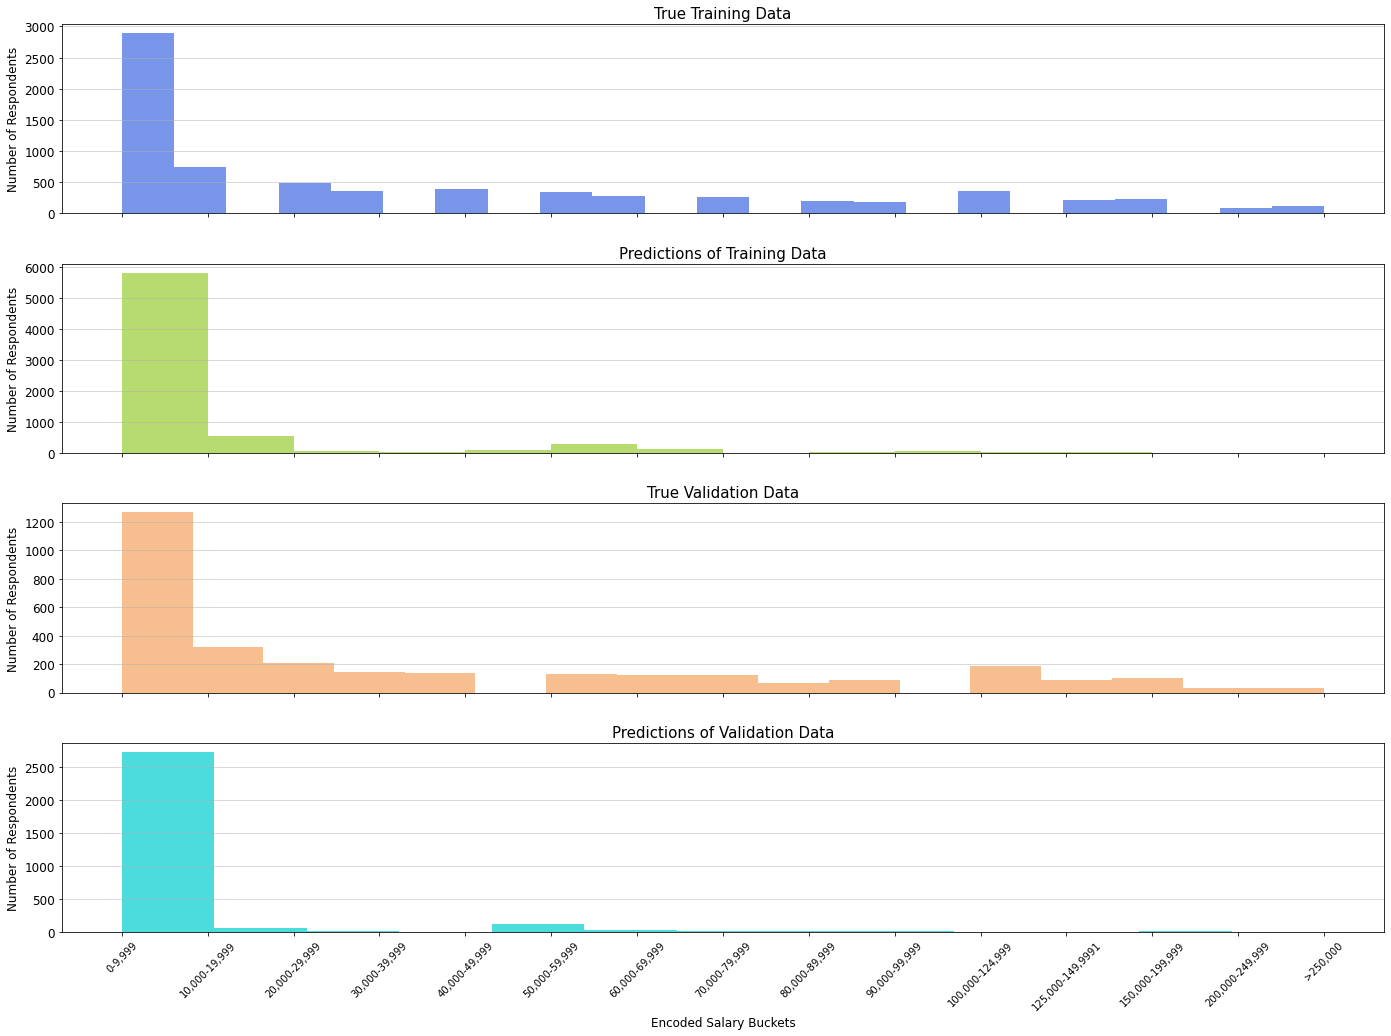

In [63]:
# Plot the distribution
from pylab import hist, show, xticks

fig,ax = plt.subplots(4, sharex=True, figsize=(20,14))

ax[0].hist(y_train, alpha=0.7, bins = 'auto', color = 'royalblue')
ax[1].hist(predictions_on_train, alpha=0.7, bins = 'auto', color = 'yellowgreen')
ax[2].hist(y_test, alpha=0.7, bins = 'auto', color = 'sandybrown')
ax[3].hist(predictions, alpha=0.7, bins = 'auto', color = 'darkturquoise')

fig.tight_layout(pad=4.0)

#Formatting plot area
ax[0].grid(axis='y', alpha=0.6)
ax[1].grid(axis='y', alpha=0.6)
ax[2].grid(axis='y', alpha=0.6)
ax[3].grid(axis='y', alpha=0.6)

ax[0].set_ylabel("Number of Respondents", fontsize=12)
ax[1].set_ylabel("Number of Respondents", fontsize=12)
ax[2].set_ylabel("Number of Respondents", fontsize=12)
ax[3].set_ylabel("Number of Respondents", fontsize=12)

plt.rc('ytick',labelsize=12)
plt.xlabel("Encoded Salary Buckets", fontsize=12)

ax[0].set_title("True Training Data", fontsize = 15)
ax[1].set_title("Predictions of Training Data", fontsize = 15)
ax[2].set_title("True Validation Data", fontsize = 15)
ax[3].set_title("Predictions of Validation Data", fontsize = 15)

xticks(range(0,15),(df_salary['Salary Buckets']), rotation = 45)

plt.show() 